<a href="https://colab.research.google.com/github/veapasichnyk/HomeWorksDataLovesAcademy/blob/main/HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
cars_df = pd.read_csv('cars.csv')

In [3]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [4]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [6]:
# Визначити категоріальні колонки
categorical_cols = cars_df.select_dtypes(include=["object", "category"]).columns

# Аналіз категоріальних колонок
for col in categorical_cols:
    print(f"\n=== Column: {col} ===")
    unique_values = cars_df[col].dropna().unique()
    num_unique = len(unique_values)
    print(f"Кількість унікальних значень: {num_unique}")
    print(f"Унікальні значення: {unique_values}")

    if num_unique == 2:
        print("-> Бінарна категорія")
    elif cars_df[col].dtype.name == "category" and cars_df[col].cat.ordered:
        print("-> Порядкова мультикатегоріальна (ordered)")
    else:
        print("-> Номінальна мультикатегоріальна (unordered)")


=== Column: Brand ===
Кількість унікальних значень: 11
Унікальні значення: ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']
-> Номінальна мультикатегоріальна (unordered)

=== Column: Model ===
Кількість унікальних значень: 58
Унікальні значення: ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport']
-> Номінальна мультикатегоріальна (unordered)

=== Column: Fuel_Type ===
Кількість унікальних значень: 2
Унікальні значення: ['Petrol' 'Diesel']
-> Бінарна категорія

=== Column: Transmission ===
Кількість унікальн

В наборі даних 8 числових і 5 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 2 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 1 колонка, для якої можна встановити відношення порядку - Owner_Type (First -> Second -> Third).

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [7]:
#Розділяємо дані на тренувальні і тест
inputs = cars_df[[col for col in cars_df.columns if col != "Price"]]
targets = cars_df["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    inputs, targets, test_size=0.2, random_state=12
)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

**Перша частина завдання**

In [8]:
X_train["Fuel_Type"].value_counts()

,count
Fuel_Type,
Petrol,41
Diesel,39


In [9]:
Fuel_Type_Codes = {'Petrol': 0, 'Diesel': 1}
X_train['Fuel_Type_Codes'] = X_train.Fuel_Type.map(Fuel_Type_Codes)
X_test['Fuel_Type_Codes'] = X_test.Fuel_Type.map(Fuel_Type_Codes)

In [10]:
X_train["Transmission"].value_counts()

,count
Transmission,
Automatic,49
Manual,31


In [11]:
Transmission_Codes = {'Manual': 0, 'Automatic': 1}
X_train['Transmission_Codes'] = X_train.Transmission.map(Transmission_Codes)
X_test['Transmission_Codes'] = X_test.Transmission.map(Transmission_Codes)

In [12]:
X_train.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0,1
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1,1
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,0,1
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0,0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,0,1


In [13]:
X_test.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,0,1
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0,0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0,0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0,0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0,0


**Друга частина завдання**

In [14]:
#One-hot encoding та fit для X_train
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X_train[['Brand']])

encoder.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [15]:
#Трансформуємо тренувальні дані
one_hot = encoder.transform(X_train[['Brand']]).toarray()
X_train[encoder.categories_[0]] = one_hot

In [16]:
#Трансформуємо тестові дані
one_hot_test = encoder.transform(X_test[['Brand']]).toarray()
X_test[encoder.categories_[0]] = one_hot_test

In [17]:
X_train.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
X_test.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Третя частина завдання**

In [19]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [20]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

Через OrdinalEncoder ми визначили порядок Owner_Type ['First', 'Second', 'Third'] -> Owner_Type_Code [0, 1, 2]

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [21]:
#Видаляємо всі НЕчислові дані
X_train_numeric = X_train.drop(columns=X_train.select_dtypes(exclude='number').columns)
X_test_numeric = X_test.drop(columns=X_test.select_dtypes(exclude='number').columns)

In [22]:
#Об'єднання X_train_numeric та y_train
train_data = pd.concat([X_train_numeric, y_train], axis=1)

In [23]:
#Будуємо матрицю кореляції
correlation_matrix = train_data.corr()

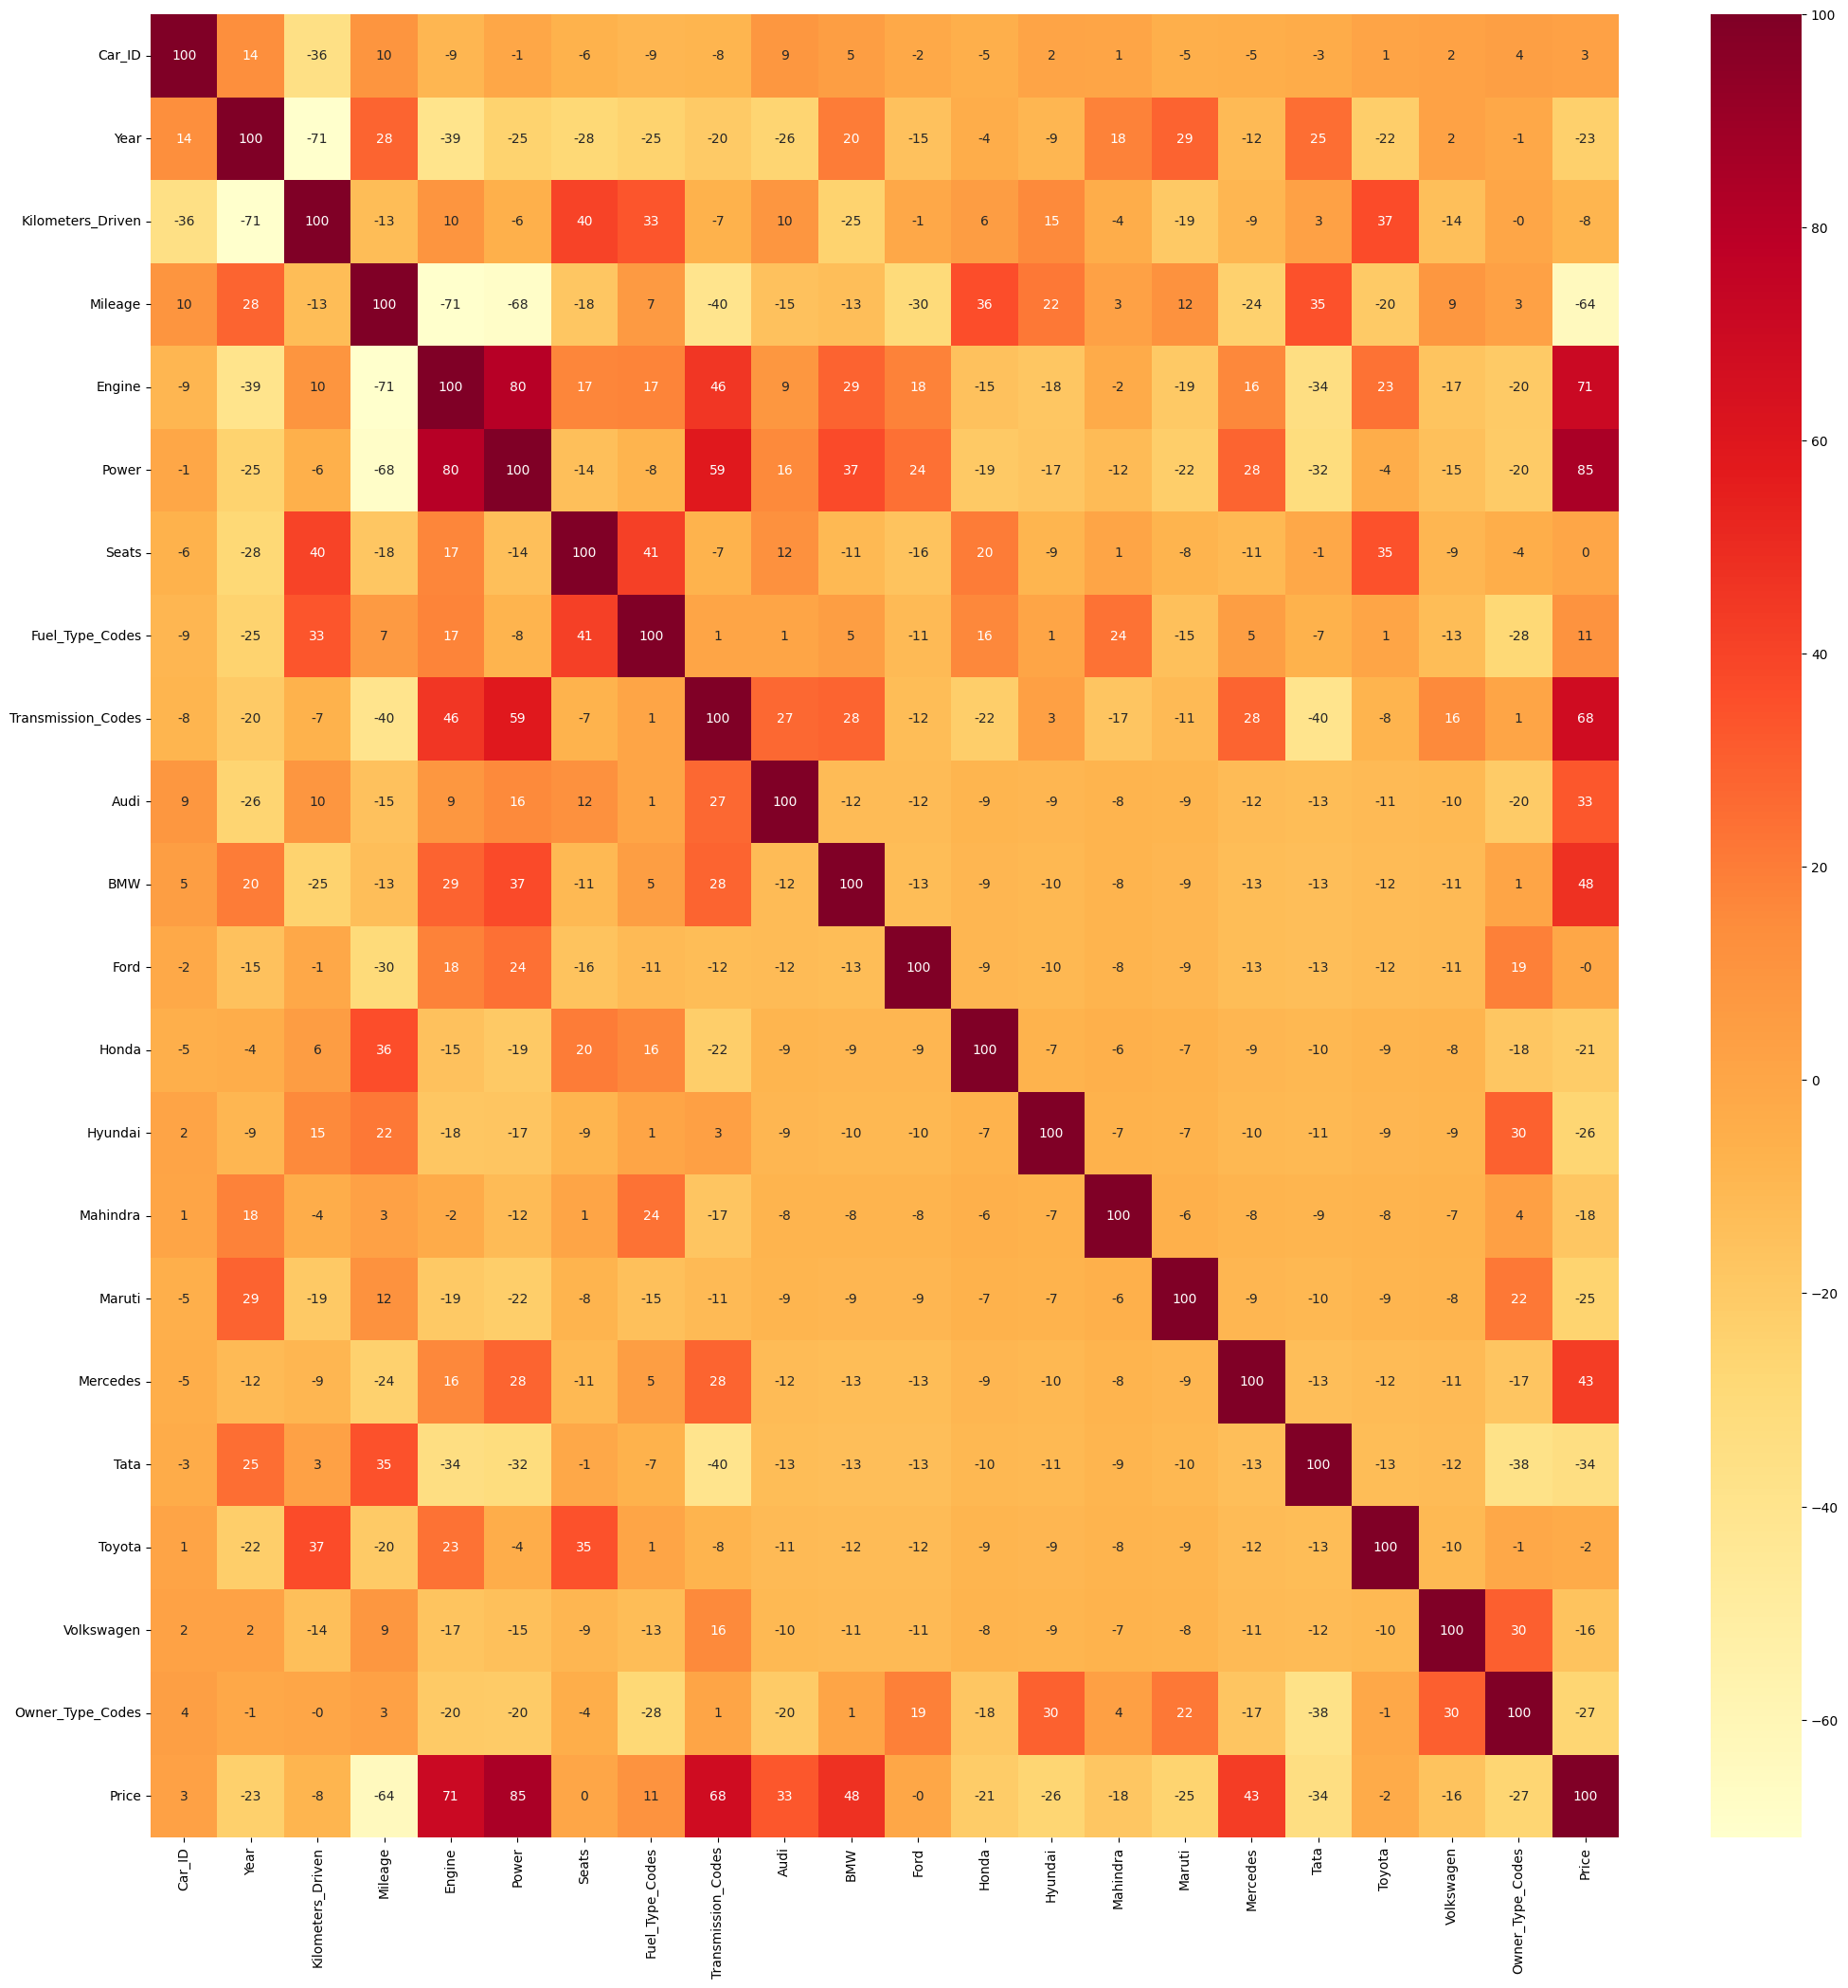

In [24]:
plt.figure(figsize = (25,25))
sns.heatmap(data = correlation_matrix*100, annot = True, cmap = "YlOrRd", cbar = True, fmt='.0f')
plt.show()

In [25]:
#Аналіз кореляції з цільовою змінною
target_correlations = correlation_matrix['Price'].drop('Price')  # Прибрати саму себе
strong_corr = target_correlations[abs(target_correlations) > 0.5]
print(strong_corr.sort_values(ascending=False))

Power                 0.849137
Engine                0.710561
Transmission_Codes    0.680731
Mileage              -0.638404
Name: Price, dtype: float64


**Спостереження**

З аналізу матриці кореляції видно, що наступні колонки мають сильний зв'язок з цільовою змінною 'Price' (|кореляція| > 0.5):

- `Power`: 0.85 (позитивна кореляція)
- `Engine`: 0.71 (позитивна кореляція)
- `Transmission_Codes`: 0.68 (позитивна кореляція)
- `Mileage`: -0.64 (негативна кореляція)

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [26]:
# Модель лінійної регресії засобами Scikit-learn
lin_reg = LinearRegression()
lin_reg.fit(X_train_numeric, y_train)


LinearRegression()

In [27]:
lin_reg.coef_[0], lin_reg.intercept_

(np.float64(198.41654512403645), np.float64(17019640.059283376))

In [28]:
predictions_train = lin_reg.predict(X_train_numeric)

In [29]:
mse_lin_reg_train = mean_squared_error(y_train, predictions_train)  # MSE
rmse_lin_reg_train = np.sqrt(mse_lin_reg_train)  # RMSE з MSE
r2_train = r2_score(y_train, predictions_train)

print(f"Точність прогнозу RMSE для набору Train: {rmse_lin_reg_train:.2f}")
print(f'R² Score Train: {r2_train:.2f}')


Точність прогнозу RMSE для набору Train: 210293.58
R² Score Train: 0.96


In [30]:
predictions_test = lin_reg.predict(X_test_numeric)

In [31]:
mse_lin_reg_test = mean_squared_error(y_test, predictions_test)  # MSE
rmse_lin_reg_test = np.sqrt(mse_lin_reg_test)  # RMSE з MSE
r2_test = r2_score(y_test, predictions_test)

print(f"Точність прогнозу RMSE для набору Test: {rmse_lin_reg_test:.2f}")
print(f'R² Score Test: {r2_test:.2f}')

Точність прогнозу RMSE для набору Test: 258181.56
R² Score Test: 0.85


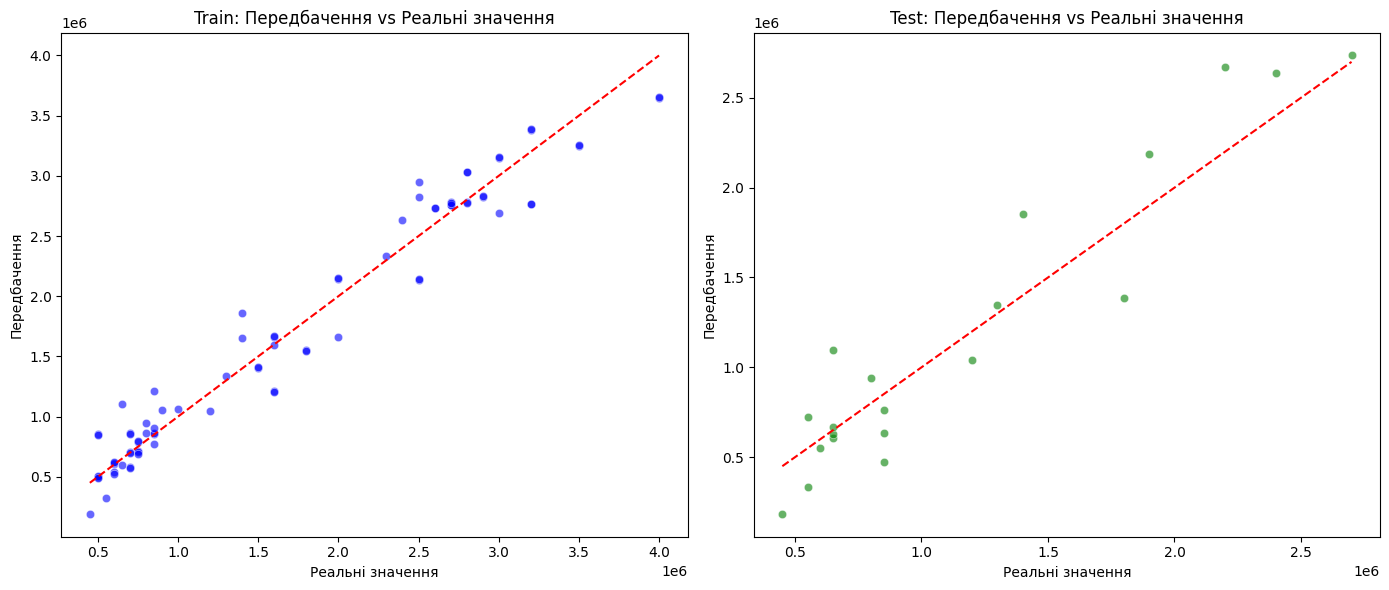

In [32]:
# Побудова графіка

# Створення фігури з двома графіками
plt.figure(figsize=(14, 6))

# Графік для TRAIN
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=predictions_train, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # лінія y=x
plt.title('Train: Передбачення vs Реальні значення')
plt.xlabel('Реальні значення')
plt.ylabel('Передбачення')

# Графік для TEST
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=predictions_test, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # лінія y=x
plt.title('Test: Передбачення vs Реальні значення')
plt.xlabel('Реальні значення')
plt.ylabel('Передбачення')

plt.tight_layout()
plt.show()

**Спостереження**

Як бачимо модель для даних Train пояснює 96% варіації цільової змінної, для Test 85%. Точність прогнозу RMSE для набору Train 210293.58(в середньому модель помиляється на ~210 тисяч, напевно Price має великі значення), для Test RMSE більша 258181.56. Графіки також показують, що модель краще працює на тренувальних даних, ніж на тестових.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

**Завдання 7.1**

In [33]:
#Ініціалізація скейлера
scaler = StandardScaler()

In [34]:
#Навчання скейлера на тренувальних даних і трансформація
X_train_scaled_array = scaler.fit_transform(X_train_numeric)
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=X_train_numeric.columns, index=X_train_numeric.index)

In [35]:
#Лише трансформація тестових даних (без повторного навчання!)
X_test_scaled = scaler.transform(X_test_numeric)

**Завдання 7.2**

In [36]:
# Ініціалізуємо модель та навчаємо модель на відмасштабованих тренувальних даних
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [37]:
# Переглядаємо коефіцієнти
coefficients = pd.Series(model.coef_, index=X_train_numeric.columns)
print(coefficients.sort_values(ascending=False))

Power                 496769.214899
Mercedes              210048.781148
BMW                   208407.313783
Audi                  205600.147769
Fuel_Type_Codes       183848.018909
Transmission_Codes    116693.768206
Owner_Type_Codes       42344.952815
Toyota                 15805.701511
Car_ID                  5608.685421
Seats                  -2148.924549
Year                   -8765.645714
Engine                -21377.453338
Honda                 -62753.005386
Tata                  -65996.246972
Volkswagen            -92968.260065
Kilometers_Driven     -94398.721486
Maruti               -112259.967020
Ford                 -118209.450311
Mileage              -131715.512030
Mahindra             -140945.162904
Hyundai              -152304.863911
dtype: float64


**Спостереження**

 Модель загалом логічно відображає вплив ознак на ціну авто.

- Найпотужніші позитивні коефіцієнти мають бренди преміум-класу, потужність, автоматична трансмісія.
- Найсильніші негативні — дешевші бренди, велика витрата пального, пробіг.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [38]:
#Додаємо константу до ознак
X_train_sm = sm.add_constant(X_train_scaled)

In [39]:
#Тренуємо модель
model_sm = sm.OLS(y_train, X_train_sm).fit()

In [40]:
#Виводимо статистичний звіт
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           2.01e-33
Time:                        17:42:50   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.74

**Спостереження**

- Незначущі ознаки (p ≥ 0.05): `Car_ID`, `Year`, `Kilometers_Driven`, `Engine`, `Seats`, `Honda`, `Tata`, `Toyota`, `Owner_Type_Codes`.

- Ознаки зі значущими коефіцієнтами (p-value < 0.05): `Mileage`, `Power`, `Fuel_Type_Codes`, `Transmission_Codes`, `Audi`, `BMW`, `Ford`, `Hyundai`, `Mahindra`, `Maruti`, `Mercedes`, `Volkswagen`.

In [41]:
# Отримуємо p-value у вигляді Series
p_values = model_sm.pvalues

# Фільтруємо ознаки, де p-value < 0.05 (тобто значущі)
significant_features = p_values[p_values < 0.05].index

# Видаляємо 'const', якщо не цікавить
significant_features = significant_features.drop('const', errors='ignore')

print("Статистично значущі ознаки при α = 0.05:")
print(list(significant_features))

Статистично значущі ознаки при α = 0.05:
['Mileage', 'Power', 'Fuel_Type_Codes', 'Transmission_Codes', 'Audi', 'BMW', 'Ford', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Volkswagen']


**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [42]:
# Формування нових даних
X_train_sig = X_train_scaled[significant_features]  # лише значущі ознаки
X_train_sig = sm.add_constant(X_train_sig)           # додаємо стовпець const

In [43]:
# Побудова моделі
model_sig = sm.OLS(y_train, X_train_sig).fit()
print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           4.12e-39
Time:                        17:59:26   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.78

**Спостереження**

R-squared = 0.951 - 95.1% варіації ціни пояснюється моделлю (у повної R-squared лише трохи знизився (0.959 → 0.951))

Adj. R-squared = 0.943 - залишається дуже високим (отже, ознаки справді важливі)

F-statistic =	109.4 -	це велике значення свідчить про те, що модель в цілому значуща

Prob (F-statistic) =	4.12e-39 - надзвичайно маленьке — модель точно не випадкова

AIC = 2227 - кращий ніж у повної(2230)

BIC =	2258 -	нижче, ніж у повної моделі (2280)

Df Residuals = 67 -	кількість спостережень – кількість параметрів (включно з const)
Df Model = 12 - кількість ознак (у повної їх 20)

**Висновок**

- Точність моделі залишилася майже такою ж, як у повної.
- Але спрощення моделі (від 20 ознак до 12) робить її більш інтерпретованою, з чистішими статистичними властивостями (менше зайвих факторів).

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [44]:
# Фільтруємо ознаки, де p-value < 0.25 (тобто значущі)
significant_features = p_values[p_values < 0.25].index

# Видаляємо 'const', якщо не цікавить
significant_features = significant_features.drop('const', errors='ignore')

print("Статистично значущі ознаки при α = 0.25:")
print(list(significant_features))

Статистично значущі ознаки при α = 0.25:
['Kilometers_Driven', 'Mileage', 'Power', 'Fuel_Type_Codes', 'Transmission_Codes', 'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Volkswagen']


In [45]:
# Формування нових даних
X_train_sig = X_train_scaled[significant_features]  # лише значущі ознаки
X_train_sig = sm.add_constant(X_train_sig)           # додаємо стовпець const

In [46]:
# Побудова моделі
model_sig = sm.OLS(y_train, X_train_sig).fit()
print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           4.85e-38
Time:                        18:21:20   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.65

**Спостереження**

R-squared = 0.958 - 95.8% варіації ціни пояснюється моделлю (якраз по середині між повною і із завдання8 (0.959 → 0.958 → 0.951))

Adj. R-squared = 0.948 - найвище значення порівняно з попередніми моделями (повна - 0.945, модель зі значущими ознаками - 0.943)

F-statistic =	97.03 -	дещо нижче ніж в попередніх

Prob (F-statistic) =	4.85e-38 - залишається надзвичайно маленьке

AIC = 2221 - кращий ніж в попередніх.

BIC = 2260 - менше ніж в повної і трохи вище проти попередньої (2280 і 2258 )

Df Residuals = 64 -	кількість спостережень – кількість параметрів (включно з const)

Df Model = 15 - кількість ознак (у повної їх 20, а у моделі зі значущими ознаками 12)

**Загальний висновок**

Я б обрала модель 3 (p-value < 0.25), тому що вона має найкращу якість (R-squared = 0.958) при меншій складності, ніж повна модель та краще узгоджується з даними (AIC найнижчий).